<a href="https://colab.research.google.com/github/Moostafaaa/Medical-Insurance-Premium-Prediction-with-Machine-Learning/blob/main/Medical_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TASK #1: UNDERSTAND THE PROBLEM STATEMENT
# The objective of this project is to predict the health insurance cost incurred by
# individuals based on their attributes(sex,bmi,child num,smoker,region(USA))

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
!pip install kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"moustafahesham","key":"45bcfb336e230e075cc313334df0fe79"}'}

In [7]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 24.5MB/s]


In [9]:
import zipfile

zip_file_path = '/content/insurance.zip'  # Replace with the actual path

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall()

In [10]:
import os

# List the contents of the current directory
print(os.listdir())

['.config', 'insurance.zip', 'insurance.csv', 'kaggle.json', 'sample_data']


In [33]:
insurance_df = pd.read_csv('/content/insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [34]:
# Check the dataframe info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS - PART 1

In [35]:
# check if there are any Null values
insurance_df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [36]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

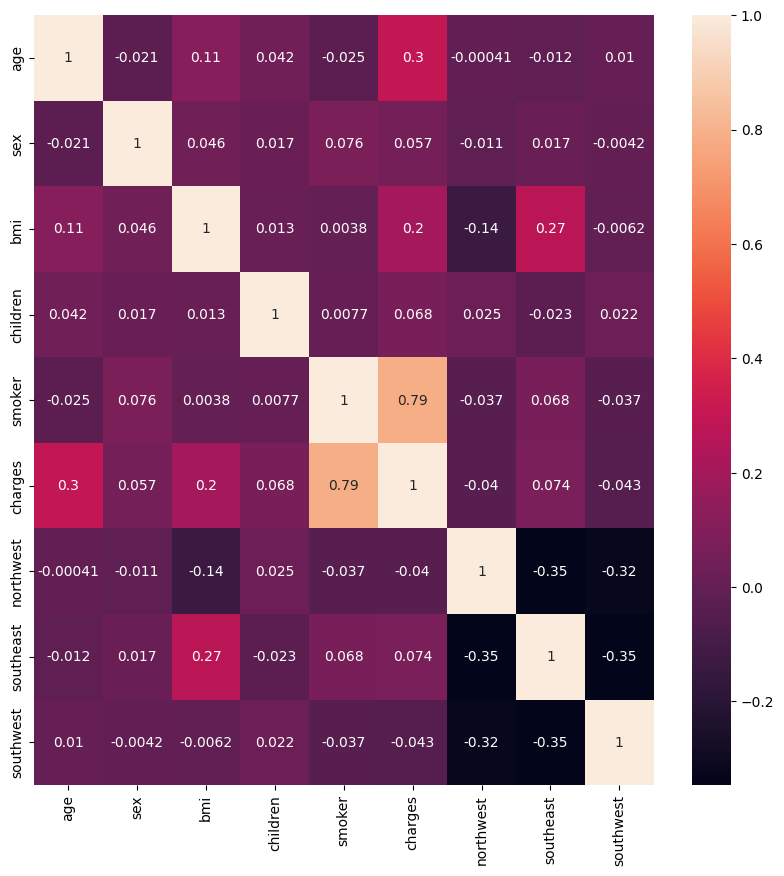

In [165]:
plt.figure(figsize = (10, 10))
sns.heatmap(insurance_df.corr(), annot = True)
# smoker and age have positive correlations with charges

In [37]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index

insurance_df.groupby(['region'],sort=True).max()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,64,male,48.07,5,yes,58571.07448
northwest,64,male,42.94,5,yes,60021.39897
southeast,64,male,53.13,5,yes,63770.42801
southwest,64,male,47.60,5,yes,52590.82939


In [38]:
# Group data by 'age' and examine the relationship between 'age' and 'charges'
# You will notice there is increasing rate between them
insurance_df.groupby(['age']).max()

,sex,bmi,children,smoker,region,charges
age,,,,,,
18,male,53.130,4,yes,southeast,38792.68560
19,male,44.880,5,yes,southwest,39722.74620
20,male,40.470,5,yes,southwest,38344.56600
21,male,39.490,4,yes,southwest,26018.95052
22,male,52.580,3,yes,southwest,44501.39820
23,male,50.380,3,yes,southwest,40904.19950
24,male,40.150,4,yes,southwest,38126.24650
25,male,45.540,5,yes,southwest,42112.23560
26,male,46.530,4,yes,southwest,36085.21900


#TASK #4: PERFORM FEATURE ENGINEERING

In [39]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [40]:
# convert categorical variable to numerical
def convert(sex):
  if sex=="female":
    return 0
  else:
    return 1

insurance_df.sex = insurance_df.sex.apply(convert)
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [41]:
# Check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [42]:
# Convert categorical variable to numerical
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [43]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [44]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True,dtype=int)
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [45]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

In [46]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [47]:
# Let's drop the original 'region' column
insurance_df.drop(['region'], axis = 1, inplace = True)


# TASK #5: PERFORM DATA VISUALIZATION

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

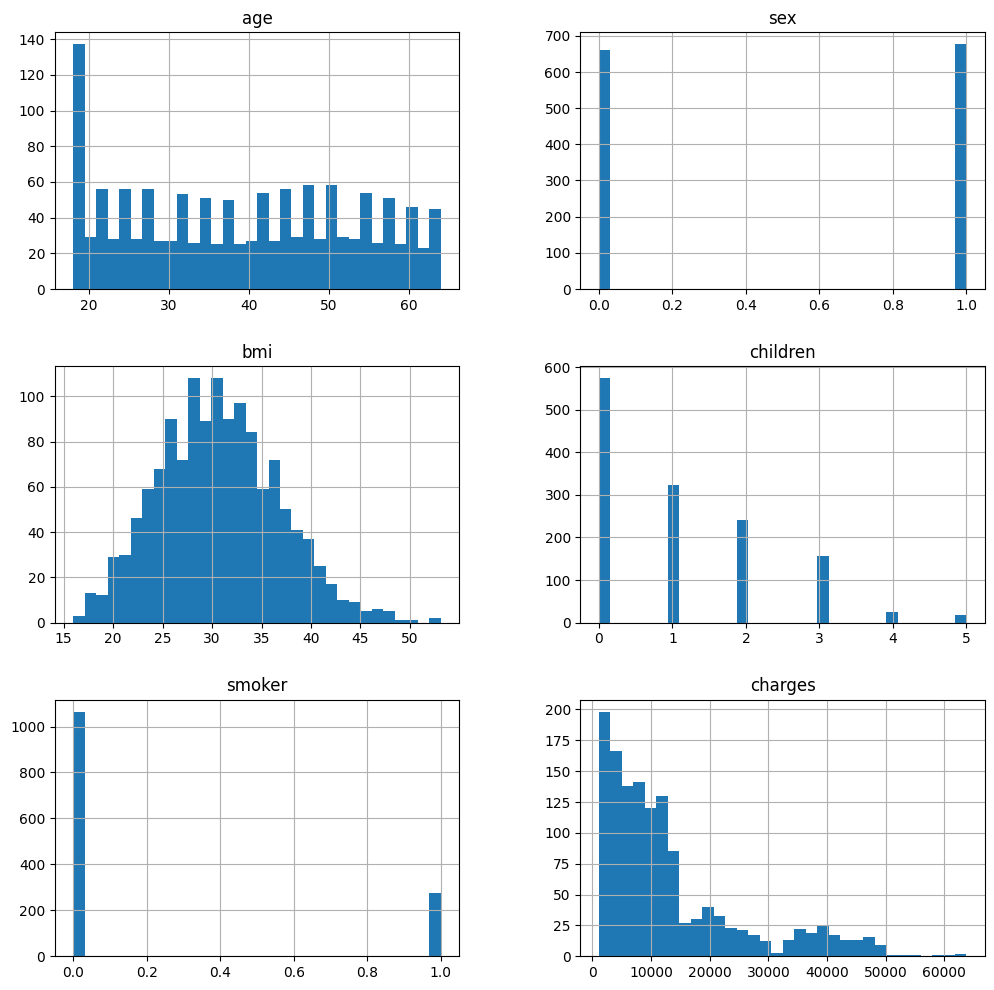

In [49]:
insurance_df[ ['age','sex','bmi','children','smoker','charges'] ].hist(bins=32,figsize=(12,12))

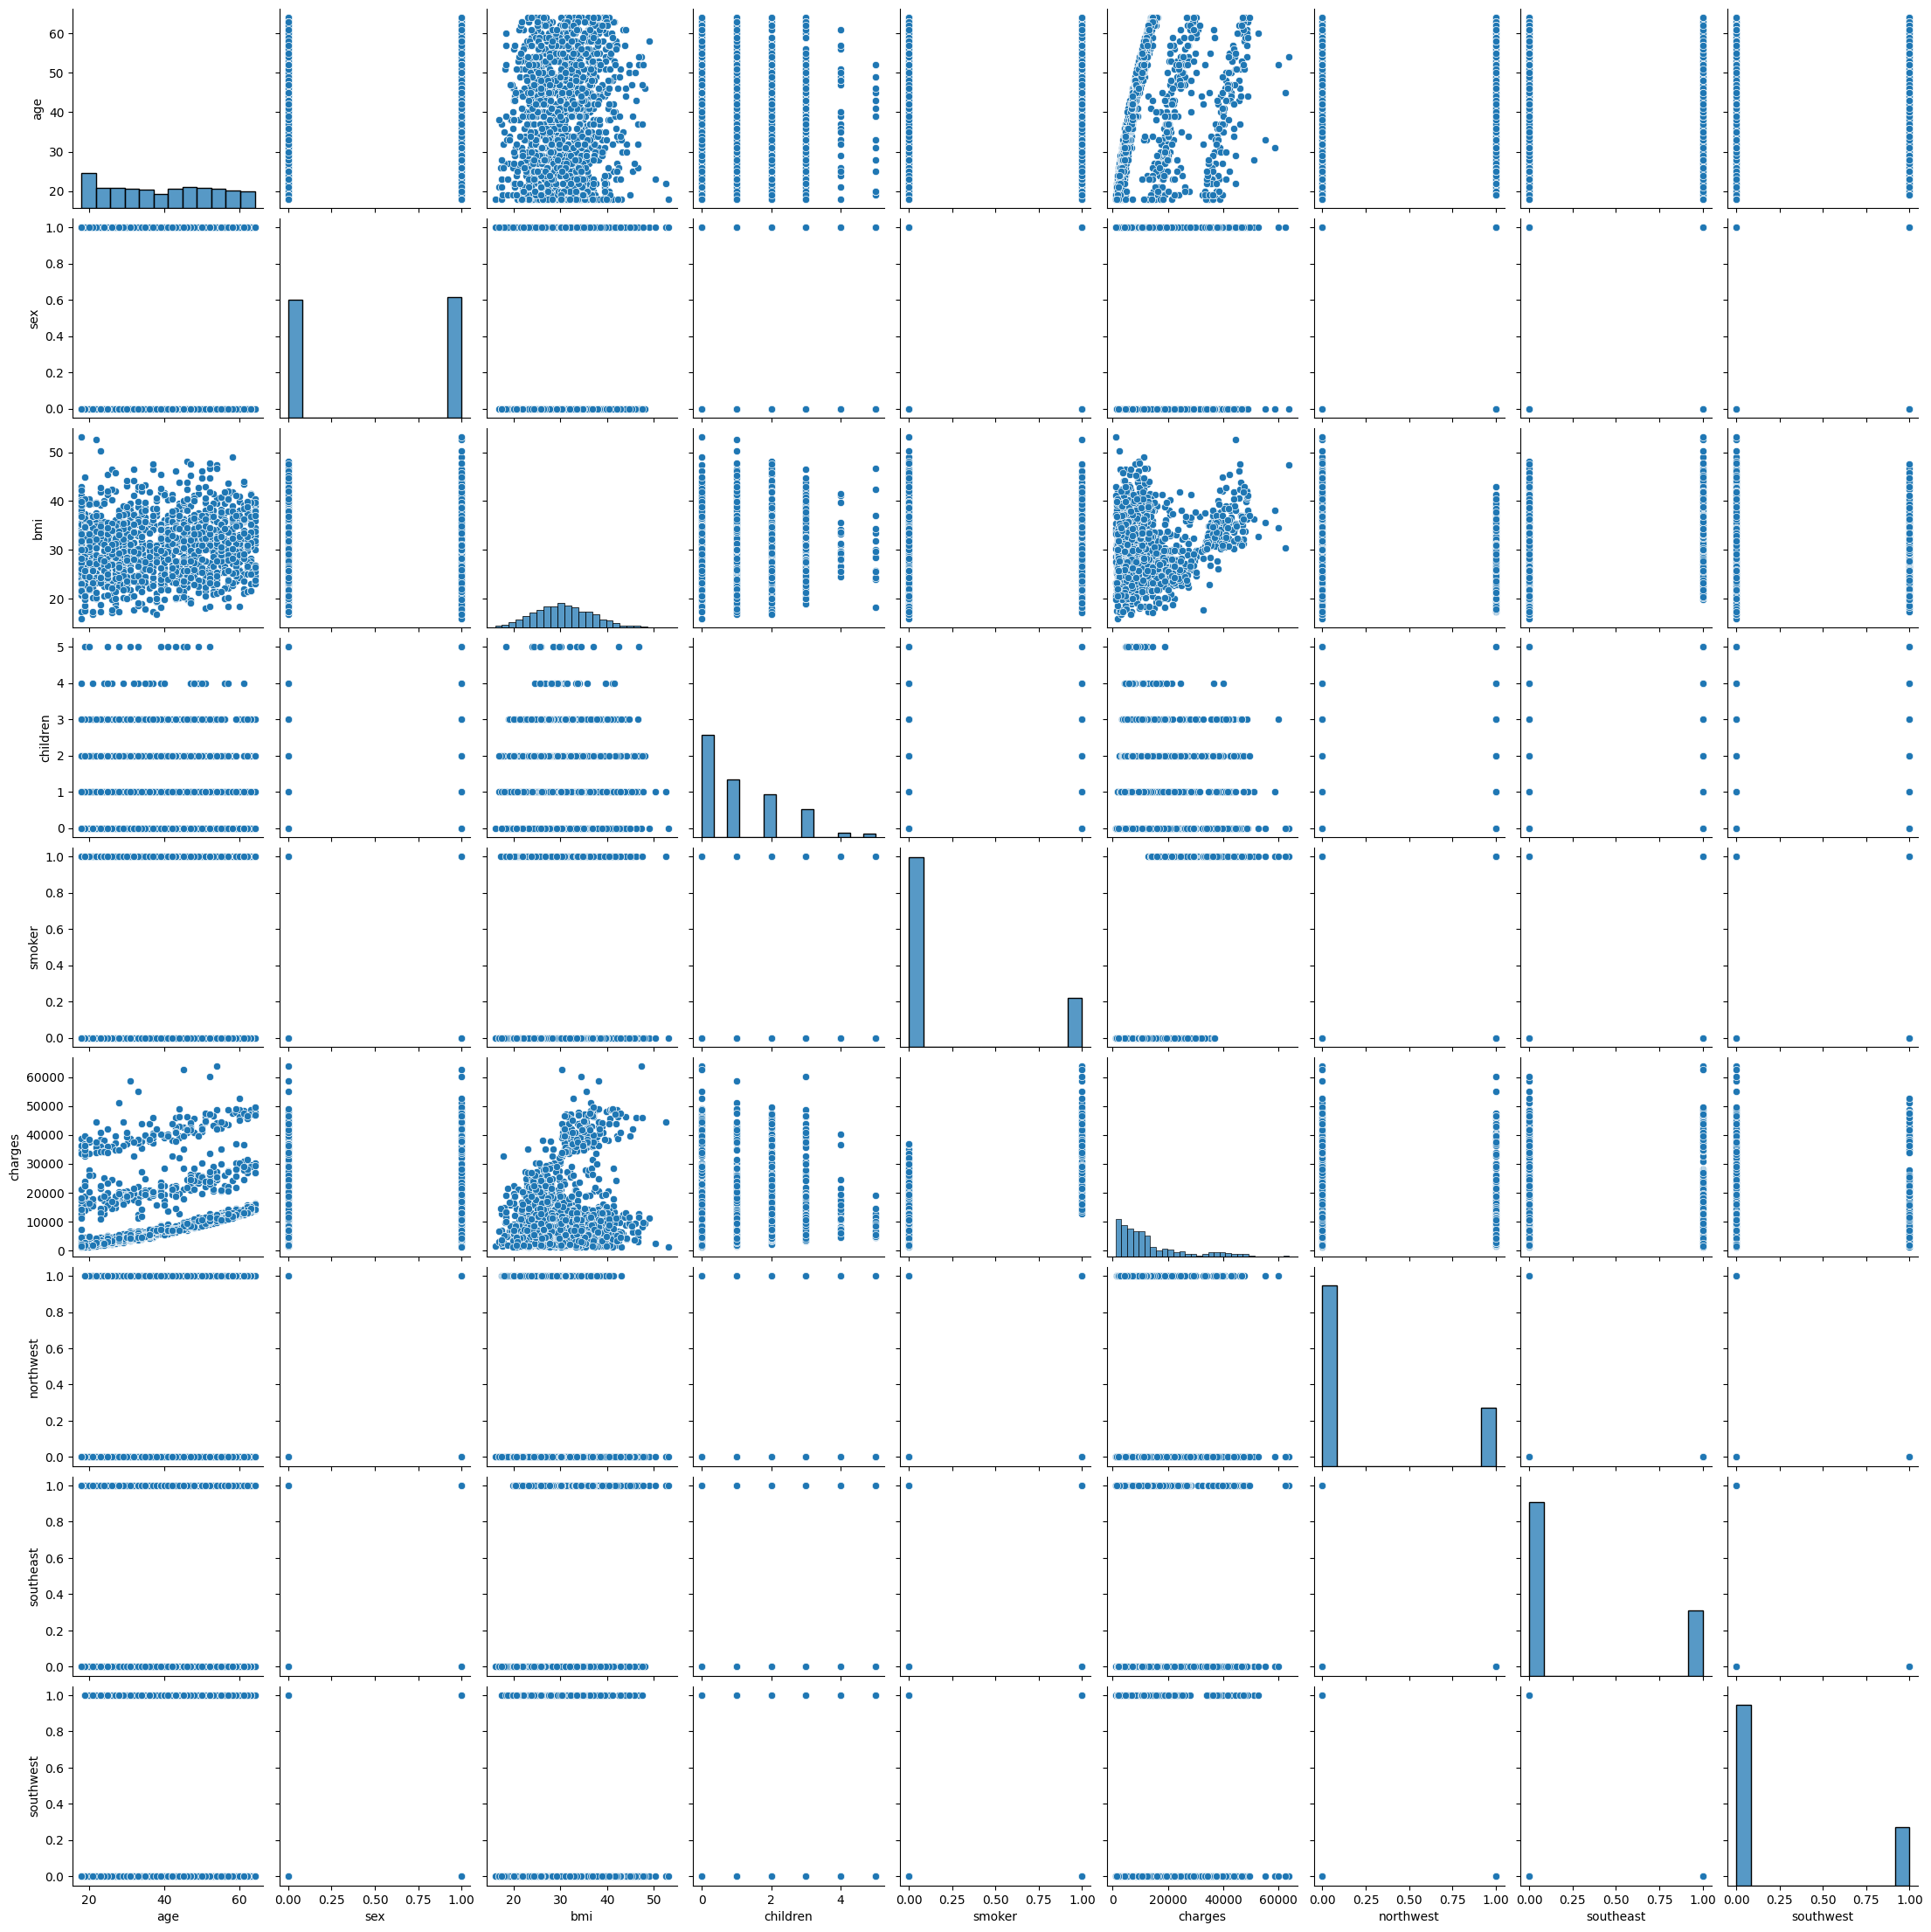

In [50]:
sns.pairplot(insurance_df)

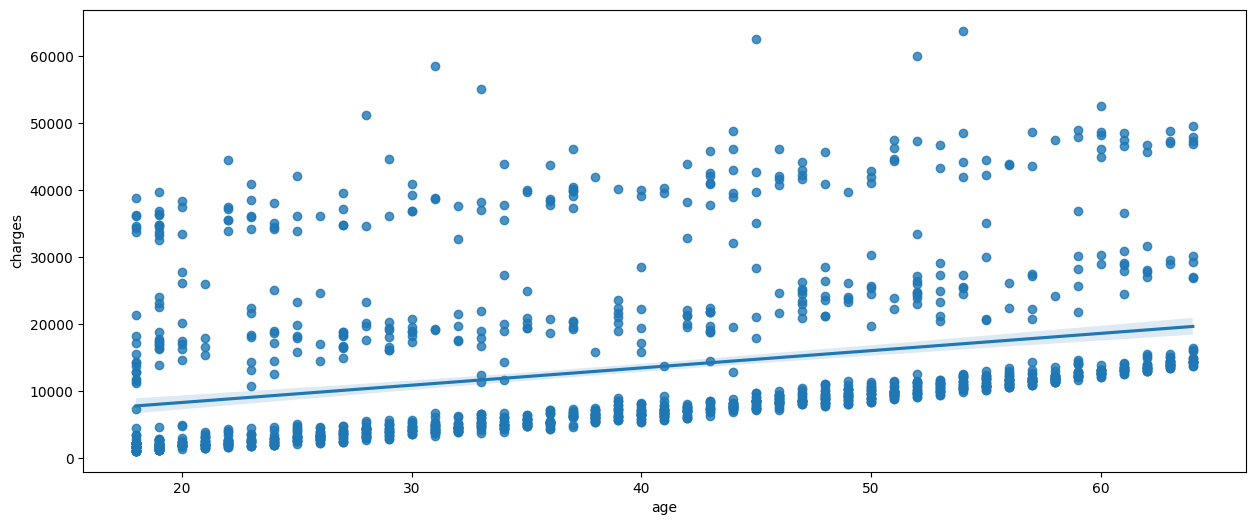

In [51]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()

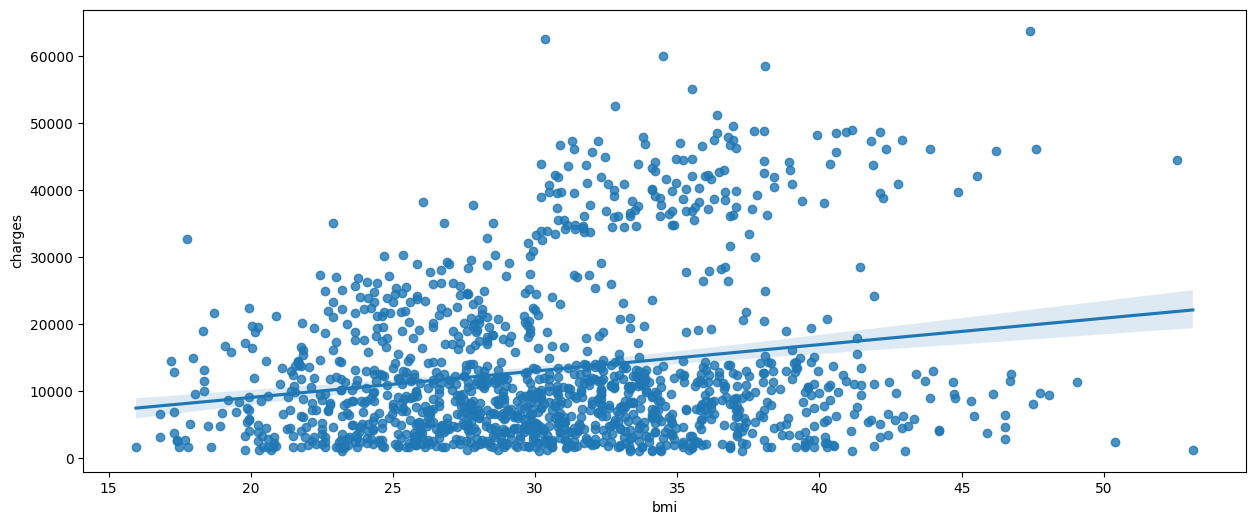

In [52]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()


In [54]:
#Calculate and plot the correlation matrix
# feature charges and smoker has the most positive correlation
insurance_df.corr(method='pearson', min_periods=1, numeric_only=False)

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


# TASK #6: CREATE TRAINING AND TESTING DATASET

In [104]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [122]:
x = insurance_df.drop('charges',axis=1)
y = insurance_df.charges

In [123]:
x

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [124]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [125]:
x.shape , y.shape

((1338, 8), (1338,))

In [126]:
x1 = x[['age','bmi','children']]
x1

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [127]:
x2=x.drop(['age','bmi','children'],axis=1)
x2

,sex,smoker,northwest,southeast,southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1333,1,0,1,0,0
1334,0,0,0,0,0
1335,0,0,0,1,0
1336,0,0,0,0,1


In [128]:
X1 = np.array(x1).astype('float32')

In [129]:
y = np.array(y).astype('float32')
y = y.reshape(-1, 1)

In [130]:
X1

array([[19.  , 27.9 ,  0.  ],
       [18.  , 33.77,  1.  ],
       [28.  , 33.  ,  3.  ],
       ...,
       [18.  , 36.85,  0.  ],
       [21.  , 25.8 ,  0.  ],
       [61.  , 29.07,  0.  ]], dtype=float32)

In [3]:
# Only take the numerical variables and scale them and exclude the binary
# features and scaling the data before feeding the model

In [131]:

from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
X1 = scaler_x.fit_transform(X1)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)


In [132]:
X1 = pd.DataFrame(X1)
X1

,0,1,2
0,-1.438764,-0.453320,-0.908614
1,-1.509965,0.509621,-0.078767
2,-0.797954,0.383307,1.580926
3,-0.441948,-1.305531,-0.908614
4,-0.513149,-0.292557,-0.908614
...,...,...,...
1333,0.768473,0.050296,1.580926
1334,-1.509965,0.206139,-0.908614
1335,-1.509965,1.014878,-0.908614
1336,-1.296362,-0.797814,-0.908614


In [133]:
X = pd.concat([X1,x2],axis=1)
X

,0,1,2,sex,smoker,northwest,southeast,southwest
0,-1.438764,-0.453320,-0.908614,0,1,0,0,1
1,-1.509965,0.509621,-0.078767,1,0,0,1,0
2,-0.797954,0.383307,1.580926,1,0,0,1,0
3,-0.441948,-1.305531,-0.908614,1,0,1,0,0
4,-0.513149,-0.292557,-0.908614,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0.768473,0.050296,1.580926,1,0,1,0,0
1334,-1.509965,0.206139,-0.908614,0,0,0,0,0
1335,-1.509965,1.014878,-0.908614,0,0,0,1,0
1336,-1.296362,-0.797814,-0.908614,0,0,0,0,1


In [134]:
X = np.array(X).astype('float32')
X

array([[-1.4387642 , -0.45332006, -0.9086137 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.5099654 ,  0.5096212 , -0.0787672 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.79795355,  0.38330686,  1.5809258 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.5099654 ,  1.0148778 , -0.9086137 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.2963619 , -0.79781353, -0.9086137 , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.5516857 , -0.261388  , -0.9086137 , ...,  1.        ,
         0.        ,  0.        ]], dtype=float32)

*  Split the data into 20% Testing and 80% Training
*   Double check that the split was successful by getting the shape of both the training and testing datasets



In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1070, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1070, 1)
Shape of y_test: (268, 1)


# TASK #7: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL IN SCIKIT-LEARN

In [100]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score



In [136]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [137]:
acc = model.score(X_test, y_test)
acc

0.783592970667653

In [139]:
y_predict = model.predict(X_test)
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


In [140]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [141]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 5796.285 
MSE = 33596920.0 
MAE = 4181.195 
R2 = 0.7835929817756149 
Adjusted R2 = 0.7769085951123134


# TASK #8: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL

In [161]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [143]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                7

In [152]:
# Compile your model
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

# Train the model
history = ANN_model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test),batch_size=20, validation_split=0.2)


Epoch 1/150
54/54 [==============================] - 1s 6ms/step - loss: 0.0391 - val_loss: 0.1966
Epoch 2/150
54/54 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.2170
Epoch 3/150
54/54 [==============================] - 0s 3ms/step - loss: 0.0366 - val_loss: 0.2041
Epoch 4/150
54/54 [==============================] - 0s 3ms/step - loss: 0.0440 - val_loss: 0.2003
Epoch 5/150
54/54 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.2066
Epoch 6/150
54/54 [==============================] - 0s 3ms/step - loss: 0.0355 - val_loss: 0.2027
Epoch 7/150
54/54 [==============================] - 0s 3ms/step - loss: 0.0366 - val_loss: 0.2079
Epoch 8/150
54/54 [==============================] - 0s 3ms/step - loss: 0.0338 - val_loss: 0.2303
Epoch 9/150
54/54 [==============================] - 0s 3ms/step - loss: 0.0409 - val_loss: 0.2209
Epoch 10/150
54/54 [==============================] - 0s 3ms/step - loss: 0.0326 - val_loss: 0.2205
Epoch 11/

In [153]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 2ms/step - loss: 0.2182
Accuracy : 0.781838670372963


9/9 [==============================] - 0s 4ms/step


Text(0, 0.5, 'True Values')

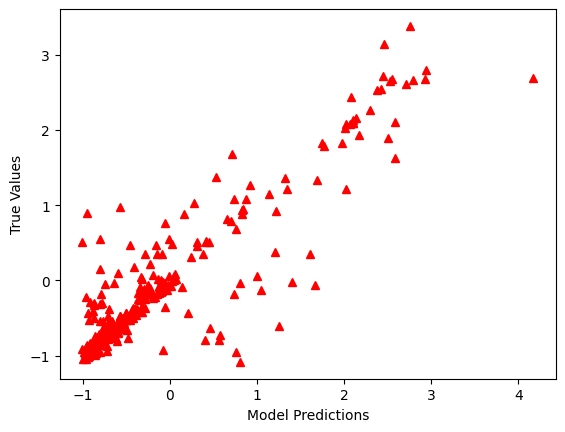

In [155]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [156]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [157]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 5654.199 
MSE = 31969964.0 
MAE = 3117.4673 
R2 = 0.7940726416244882 
Adjusted R2 = 0.7877119510182948


*  Dropout is a regularization technique that is used to improve the network generalization ability. Experiment adding dropout layers to enahnce network generalization ability
*  Retrain the network and assess its performance

In [162]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.35))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.55))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.75))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 50)                450       
                                                                 
 activation_9 (Activation)   (None, 50)                0         
                                                                 
 dense_12 (Dense)            (None, 150)               7650      
                                                                 
 activation_10 (Activation)  (None, 150)               0         
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_13 (Dense)            (None, 150)               22650     
                                                                 
 activation_11 (Activation)  (None, 150)              

In [163]:
# Compile your model
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

# Train the model
history = ANN_model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test),batch_size=20, validation_split=0.2)


Epoch 1/150
54/54 [==============================] - 3s 12ms/step - loss: 0.9901 - val_loss: 0.6759
Epoch 2/150
54/54 [==============================] - 0s 6ms/step - loss: 0.6447 - val_loss: 0.3454
Epoch 3/150
54/54 [==============================] - 0s 7ms/step - loss: 0.4335 - val_loss: 0.1865
Epoch 4/150
54/54 [==============================] - 0s 4ms/step - loss: 0.3963 - val_loss: 0.1747
Epoch 5/150
54/54 [==============================] - 0s 3ms/step - loss: 0.3694 - val_loss: 0.1919
Epoch 6/150
54/54 [==============================] - 0s 4ms/step - loss: 0.3525 - val_loss: 0.2344
Epoch 7/150
54/54 [==============================] - 0s 3ms/step - loss: 0.3173 - val_loss: 0.1751
Epoch 8/150
54/54 [==============================] - 0s 3ms/step - loss: 0.3396 - val_loss: 0.1778
Epoch 9/150
54/54 [==============================] - 0s 3ms/step - loss: 0.3012 - val_loss: 0.1760
Epoch 10/150
54/54 [==============================] - 0s 4ms/step - loss: 0.2867 - val_loss: 0.2531
Epoch 11

In [172]:
preds = ANN_model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


In [173]:
r2_score(y_test,preds)

0.8569353610239081

# Random Forest Regressor

In [166]:
from sklearn.metrics import r2_score

In [167]:
from sklearn.ensemble import RandomForestRegressor

In [168]:
model = RandomForestRegressor(max_depth=5, max_features=8, min_samples_split=15, n_estimators=1000)


In [169]:
model.fit(X_train,y_train)

<ipython-input-169-b7a8c64777c1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestRegressor(max_depth=5, max_features=8, min_samples_split=15,
                      n_estimators=1000)

In [170]:
prediction = model.predict(X_test)

In [171]:
r2_score(y_test,prediction)

0.8745402957992371